In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# experimental data
tspan = [0, 0.1, 0.2, 0.4, 0.8, 1]
Ca_data = [2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]

In [3]:
def myode(t, Y, k):
    Ca = Y
    dcadt = -k*Ca
    return [dcadt]

def fitfunc(t, k):
    Ca0 = Ca_data[0] # initial conditions
    sol = solve_ivp(myode, [t[0], t[-1]], [Ca0], t_eval = t, args=(k,))
    Ca, = sol.y
    return Ca # function that returns Ca computed from an ODE for a k

In [4]:
# curve fit
k_fit, kcov = curve_fit(fitfunc, tspan, Ca_data, p0 = 1.3)

# summarize the parameter values
k = k_fit

# fine a sequence of inputs between the smallest and largest known inputs
tfit = np.linspace(min(tspan), max(tspan))

# calculate the output for the range
fit_y = fitfunc(tfit, k)

Text(0, 0.5, 'C$_a$')

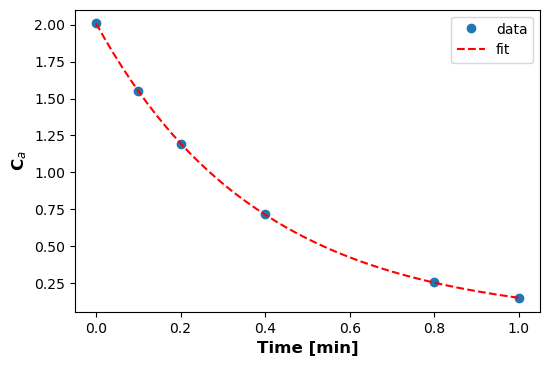

In [5]:
fig = plt.subplots(dpi = 100)
plt.plot(tspan, Ca_data, 'o', label='data')
plt.plot(tfit, fit_y, 'r--', label='fit')
plt.legend(loc='best')
plt.xlabel('Time [min]', fontsize=12, fontweight='bold')
plt.ylabel('C$_a$', fontsize=12, fontweight='bold')

In [6]:
'The rate constant was calculated to be %1.3f' %k

'The rate constant was calculated to be 2.589'